In [1]:
# This sample program tries an unsupervised learning technique to find clusters in a dataset. 
# The data is a set of features from some passive acoustic monitoring. Analyzing hydrophone data,
# I detected marine mammal clicks, and grouped them into click trains. For each click train, I
# calculated the following features:
#
# f_Hz_Median: the peak frequency of the spectrum of the clock train 
#ICI: the median inter-click interval of the click train
# num_Clicks: the number of clicks in the click train
# var_RI: the variance of the (5-minute) recording interval that contains the click train
# 
# So, in this program, I use the dbscan method from scikitlearn to look for clusters in the data.
# First, I show some scatter plots.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

import pandas
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


In [3]:
# Read csv files of the following features
# 'f_Hz_Median', 'ICI', 'num_Clicks', 'var_RI'
# where therefeatures are per click train except
# var_RI, which is the variance of the associated 
# 5-minute recording interval
df = pandas.read_csv('ct_features.csv', header=0)

# Inspect
df.dtypes
df.head()
df.describe()


,f_Hz_Median,ICI,num_Clicks,var_RI
count,22740.000000,22740.000000,22740.000000,22740.000000
mean,6550.580475,0.097088,90.066711,0.000027
std,1200.578798,0.133595,321.621372,0.000037
min,4088.000000,0.002625,8.000000,0.000000
25%,5792.000000,0.003784,14.000000,0.000013
50%,6632.000000,0.045044,33.000000,0.000019
75%,7432.000000,0.136124,131.000000,0.000030
max,9152.000000,0.933167,19618.000000,0.001264


In [4]:
# Histogram of num_Clicks --why takes so long?
#n, bins, patches = plt.hist(df[['num_Clicks']])

#plt.show()

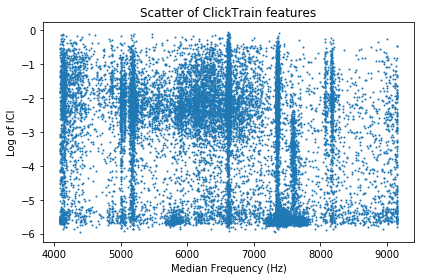

In [5]:
# Scatter of ICI, f_Hz_Median
fig, ax = plt.subplots()
ax.scatter(df[['f_Hz_Median']], np.log(df[['ICI']]), s=1)

ax.set_xlabel(r'Median Frequency (Hz)', fontsize=10)
ax.set_ylabel(r'Log of ICI', fontsize=10)
ax.set_title('Scatter of ClickTrain features')
ax.grid(False)
fig.tight_layout()

plt.show()

/opt/conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


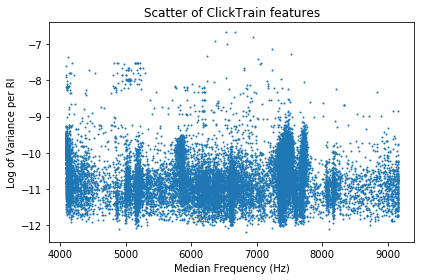

In [6]:
# Scatter of var_RI, f_Hz_Median 
fig, ax = plt.subplots()
ax.scatter(df[['f_Hz_Median']], np.log(df[['var_RI']]), s=1)

ax.set_xlabel(r'Median Frequency (Hz)', fontsize=10)
ax.set_ylabel(r'Log of Variance per RI', fontsize=10)
ax.set_title('Scatter of ClickTrain features')
ax.grid(False)
fig.tight_layout()

plt.show()

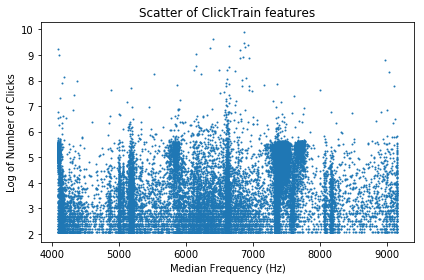

In [7]:
# Scatter of num_Clicks, f_Hz_Median 
fig, ax = plt.subplots()
ax.scatter(df[['f_Hz_Median']], np.log(df[['num_Clicks']]),  s=1)

ax.set_xlabel(r'Median Frequency (Hz)', fontsize=10)
ax.set_ylabel(r'Log of Number of Clicks', fontsize=10)
ax.set_title('Scatter of ClickTrain features')
ax.grid(False)
fig.tight_layout()

plt.show()

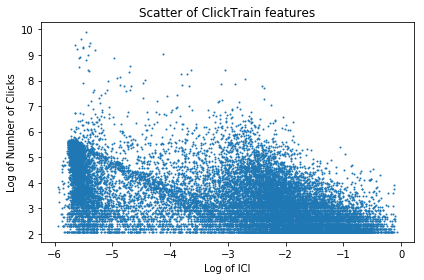

In [8]:
# Scatter of num_Clicks, ICI 
fig, ax = plt.subplots()
ax.scatter(np.log(df[['ICI']]), np.log(df[['num_Clicks']]),  s=1)

ax.set_xlabel(r'Log of ICI', fontsize=10)
ax.set_ylabel(r'Log of Number of Clicks', fontsize=10)
ax.set_title('Scatter of ClickTrain features')
ax.grid(False)
fig.tight_layout()

plt.show()

/opt/conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


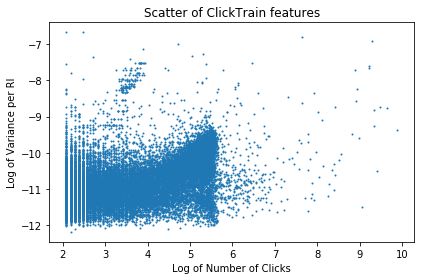

In [9]:
# Scatter of var_RI, num_Clicks
fig, ax = plt.subplots()
ax.scatter(np.log(df[['num_Clicks']]), np.log(df[['var_RI']]), s=1)

ax.set_xlabel(r'Log of Number of Clicks', fontsize=10)
ax.set_ylabel(r'Log of Variance per RI', fontsize=10)
ax.set_title('Scatter of ClickTrain features')
ax.grid(False)
fig.tight_layout()

plt.show()

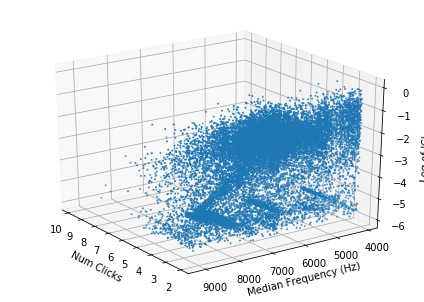

In [10]:
# 3D scatter
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=25, azim=145)
ax.scatter(np.log(df[['num_Clicks']]), df[['f_Hz_Median']],  np.log(df[['ICI']]), s=1)
ax.set_xlabel('Num Clicks')
ax.set_ylabel('Median Frequency (Hz)')
ax.set_zlabel('Log of ICI')

plt.show()



In [11]:
# Try DBSCAN, following example at 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
# First, convert the features from pandas dataframe to a NumPy array
features = df.values

# Declaring Model
dbscan = DBSCAN(eps=15.0, min_samples=50)

# Fitting
dbscan.fit(features)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)




Estimated number of clusters: 25
Estimated number of noise points: 8529


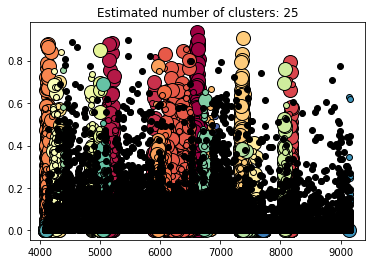

In [12]:
# Plot results of DBSCAN
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = features[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = features[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [13]:
# Compare this to some of the scatter plots. I think this method may not be very good because there are only two 
# "knobs" to tweak, eps and min_samples.
#
# An interesting approach might be a model-based approach, where you make clusters around certain 
# peak-frequencies, allowing the frequency to spread as the ICI gets lower.
#
# Also, I see that there's an interesting paper where the authors used the CW (Chinese Whisper)
# method, so I will try that next. See the following reference:
# Frasier KE, Roch MA, Soldevilla MS, Wiggins SM, Garrison LP, Hildebrand JA (2017) Automated classification of 
# dolphin echolocation click types from the Gulf of Mexico. PLoS Comput Biol 13(12): e1005823. 
# https://doi.org/10.1371/journal.pcbi.1005823
#